In [1]:
graph = {'A': ['B', 'C'],
             'B': ['C', 'D'],
             'C': ['D'],
             'D': ['C'],
             'E': ['F'],
             'F': ['C']}

In [55]:
import random
import string
import itertools
import time
            
# for entry in graph:
#     print ('\n\n' + entry + '  :  ' +  str(graph[entry]))
    
def find_shortest_path_naive(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    if start not in graph:
        return None
    shortest = None
    for node in graph[start]:
        if node not in path:
            newpath = find_shortest_path(graph, node, end, path)
            if newpath:
                if not shortest or len(newpath) < len(shortest):
                    shortest = newpath
    return shortest

def floydWarshall(graph):
    nodes = graph.keys()

    distance = {}

    for n in nodes:
        distance[n] = {}

        for k in nodes:
            if k in graph[n]:
                distance[n][k] = 1
            else:
                distance[n][k] = float("inf")

    for k in nodes:
        for i in nodes:
            for j in nodes:
                distance[i][j] = min (distance[i][j], distance[i][k] + distance[k][j])
                
    #print(distance)


def build_graph(n_nodes):
    nodes = []
    name_length = 8
    probabiliy = 0.2
    
    for i in range(n_nodes):
        hash = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(name_length))
        nodes.append(hash)
        
    graph = {}
    
    for node in nodes:
        graph[node]= []
        for other_node in nodes:
            if random.uniform(0.0, 1.0) < probabiliy:
                graph[node].append(other_node)
                
    #print(graph)            
    return graph


n_nodes = 0
times_naive = {}
times_floyd = {}
while True:
    try:
        n_nodes = n_nodes + 1
        graph = build_graph(n_nodes)
        
        combinations = itertools.combinations(graph, 2)
        
        start_time = time.time()
        
        #for combination in combinations:
        #    #print('\n# Shortest path between: ' + str(combination))
        #    #print(find_shortest_path(graph, combination[0], combination[1]))
        #    find_shortest_path_naive(graph, combination[0], combination[1])
        #    pass
        #    
        stopped_time = time.time() - start_time
        print("n_nodes naive: " + str(n_nodes) + ":%s seconds" % stopped_time)
        times_naive[n_nodes] = stopped_time
        
        
        start_time = time.time()
        floydWarshall(graph)
        stopped_time = time.time() - start_time
        print("n_nodes floyd: " + str(n_nodes) + ":%s seconds" % stopped_time)
        times_floyd[n_nodes] = stopped_time
        
    except KeyboardInterrupt:
        break
        
        
# Floyd

n_nodes naive: 1:9.5367431640625e-07 seconds
n_nodes floyd: 1:1.0013580322265625e-05 seconds
n_nodes naive: 2:0.0 seconds
n_nodes floyd: 2:1.1920928955078125e-05 seconds
n_nodes naive: 3:0.0 seconds
n_nodes floyd: 3:2.5987625122070312e-05 seconds
n_nodes naive: 4:9.5367431640625e-07 seconds
n_nodes floyd: 4:4.696846008300781e-05 seconds
n_nodes naive: 5:9.5367431640625e-07 seconds
n_nodes floyd: 5:8.606910705566406e-05 seconds
n_nodes naive: 6:0.0 seconds
n_nodes floyd: 6:0.00014209747314453125 seconds
n_nodes naive: 7:0.0 seconds
n_nodes floyd: 7:0.0002269744873046875 seconds
n_nodes naive: 8:0.0 seconds
n_nodes floyd: 8:0.0003161430358886719 seconds
n_nodes naive: 9:1.1920928955078125e-06 seconds
n_nodes floyd: 9:0.00042700767517089844 seconds
n_nodes naive: 10:9.5367431640625e-07 seconds
n_nodes floyd: 10:0.0006079673767089844 seconds
n_nodes naive: 11:9.5367431640625e-07 seconds
n_nodes floyd: 11:0.0008718967437744141 seconds
n_nodes naive: 12:9.5367431640625e-07 seconds
n_nodes fl

In [56]:
print(times_naive)
print(times_floyd)

{1: 9.5367431640625e-07, 2: 0.0, 3: 0.0, 4: 9.5367431640625e-07, 5: 9.5367431640625e-07, 6: 0.0, 7: 0.0, 8: 0.0, 9: 1.1920928955078125e-06, 10: 9.5367431640625e-07, 11: 9.5367431640625e-07, 12: 9.5367431640625e-07, 13: 0.0, 14: 1.1920928955078125e-06, 15: 0.0, 16: 1.1920928955078125e-06, 17: 9.5367431640625e-07, 18: 0.0, 19: 0.0, 20: 9.5367431640625e-07, 21: 0.0, 22: 0.0, 23: 9.5367431640625e-07, 24: 9.5367431640625e-07, 25: 1.1920928955078125e-06, 26: 0.0, 27: 1.1920928955078125e-06, 28: 0.0, 29: 1.1920928955078125e-06, 30: 9.5367431640625e-07, 31: 9.5367431640625e-07, 32: 1.1920928955078125e-06, 33: 0.0, 34: 0.0, 35: 9.5367431640625e-07, 36: 9.5367431640625e-07, 37: 0.0, 38: 9.5367431640625e-07, 39: 9.5367431640625e-07, 40: 0.0, 41: 0.0, 42: 9.5367431640625e-07, 43: 9.5367431640625e-07, 44: 1.1920928955078125e-06, 45: 9.5367431640625e-07, 46: 9.5367431640625e-07, 47: 0.0, 48: 9.5367431640625e-07, 49: 9.5367431640625e-07, 50: 9.5367431640625e-07, 51: 0.0, 52: 0.0, 53: 9.5367431640625e

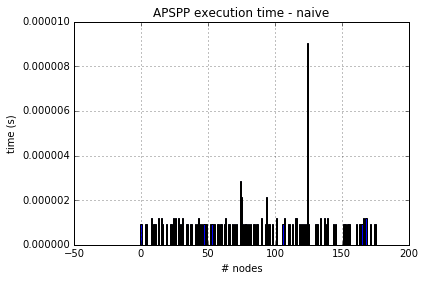

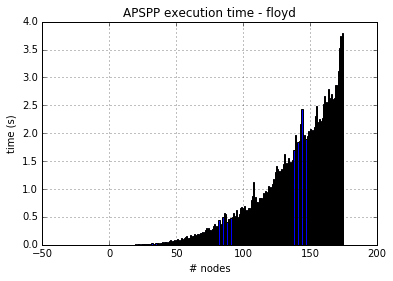

In [57]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(range(len(times_naive)), times_naive.values(), align='center')

plt.xlabel('# nodes')
plt.ylabel('time (s)')
plt.title('APSPP execution time - naive')
plt.grid(True)
plt.show()

plt.bar(range(len(times_floyd)), times_floyd.values(), align='center')

plt.xlabel('# nodes')
plt.ylabel('time (s)')
plt.title('APSPP execution time - floyd')
plt.grid(True)
plt.show()

In [91]:
# Floyd Warshal

{'node_10': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_9': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_7': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_5': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_8': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_4': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}, 'node_6': {'node_10': 1, 'node_9': 1, 'node_7': 1, 'node_5': 1, 'node_8': 1, 'node_4': 1, 'node_6': 1}}
